In [1]:
# results_analysis.ipynb
# Alexis Perumal, Venkat Pinnika, Young You, 1/6/2020
#
# For purposes of hyperparameter tuning, read in the results of a batch of prediction
# runs and plot them.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [43]:
metrics_file = "output/2020-01-06_08-10-28.236415_output.csv"
results_df = pd.read_csv(metrics_file)
results_df.head()

,Unnamed: 0,Season,Lookback,Num Games,Num Correct,% Correct,Timestamp,Run Duration,Comment
0,0,2012,1,2430,1135,46.707819,2020-01-06 00:57:37.078154,0 days 00:00:51.351920000,NaN
1,1,2013,1,2431,1124,46.236117,2020-01-06 00:58:28.433918,0 days 00:00:50.851626000,NaN
2,2,2014,1,2430,1142,46.995885,2020-01-06 00:59:19.289431,0 days 00:00:50.748963000,NaN
3,3,2015,1,2429,1113,45.821326,2020-01-06 01:00:10.042293,0 days 00:00:50.065483000,NaN
4,4,2016,1,2428,1141,46.993410,2020-01-06 01:01:00.111437,0 days 00:00:50.713961000,NaN


In [44]:
season_gb = results_df.groupby('Season')
type(season_gb)
y = season_gb.get_group(2012)['% Correct']
print(y)
x = season_gb.get_group(2012)['Lookback']
print(x)


0     46.707819
6     48.971193
12    58.189300
18    62.057613
24    60.493827
30    57.901235
36    57.901235
42    57.078189
48    56.090535
54    52.716049
Name: % Correct, dtype: float64
0       1
6       2
12      5
18     10
24     15
30     20
36     25
42     50
48    100
54    200
Name: Lookback, dtype: int64


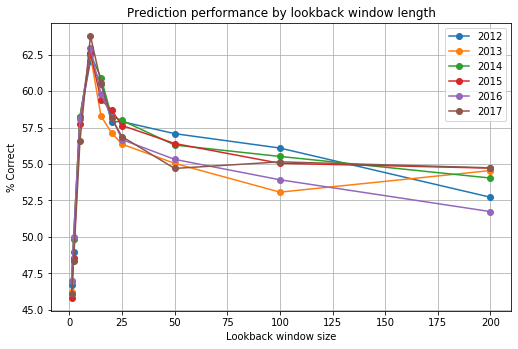

In [45]:
fig = plt.figure(figsize=(8,5))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_title('Prediction performance by lookback window length')
axes.set_xlabel('Lookback window size')
axes.set_ylabel('% Correct')

for season in range(2012, 2018):
    x = season_gb.get_group(season)['Lookback']
    y = season_gb.get_group(season)['% Correct']
    axes.plot(x, y, label=str(season), marker='o')
    
axes.legend()
axes.grid()
plt.show()

In [42]:
image_file = "plots/" + str(datetime.datetime.now()).replace(':', '-').replace(' ', '_') + '.png'
fig.savefig(image_file)